# Corporate Default Prediction

Import the required libraries

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.simplefilter("ignore")

### Data Collection

Import the market data for all the banks \
Failed banks: Credit Suisse, First Republic Bank, Signature Bank, Silicon Valley Bank \
Successful banks: Goldman Sachs, Bank of America, JPMorgan Chase, Wells Fargo

In [2]:
# Credit Suisse
cs = pd.read_csv("Datasets/Failed/CS Historical Data.csv")
cs['Date'] = pd.to_datetime(cs['Date'], format="%d/%m/%y")
cs.set_index('Date', inplace=True)
cs.sort_index(inplace=True)
cs['Tag'] = "CS"

# First Republic Bank
frb = pd.read_csv(r"Datasets/Failed/FRCB Historical Data.csv")
frb['Date'] = pd.to_datetime(frb['Date'], format="%d/%m/%y")
frb.set_index('Date', inplace=True)
frb.sort_index(inplace=True)
frb['Tag'] = "FRB"

# Signature Bank
sb = pd.read_csv(r"Datasets/Failed/SBNY Historical Data.csv")
sb['Date'] = pd.to_datetime(sb['Date'], format="%d/%m/%y")
sb.set_index('Date', inplace=True)
sb.sort_index(inplace=True)
sb['Tag'] = "SB"

# Silicon Valley Bank
svb = pd.read_csv(r"Datasets/Failed/SIVBQ Historical Data.csv")
svb['Date'] = pd.to_datetime(svb['Date'], format="%d/%m/%y")
svb.set_index('Date', inplace=True)
svb.sort_index(inplace=True)
svb['Tag'] = "SVB"

# Goldman Sachs
gs = pd.read_csv(r"Datasets/Not Failed/GS Historical Data.csv")
gs['Date'] = pd.to_datetime(gs['Date'], format="%d/%m/%y")
gs.set_index('Date', inplace=True)
gs.sort_index(inplace=True)
gs['Tag'] = "GS"

# Bank of America
boa = pd.read_csv(r"Datasets/Not Failed/BAC Historical Data.csv")
boa['Date'] = pd.to_datetime(boa['Date'], format="%d/%m/%y")
boa.set_index('Date', inplace=True)
boa.sort_index(inplace=True)
boa['Tag'] = "BOA"

# JPMorgan Chase
jpm = pd.read_csv(r"Datasets/Not Failed/JPM Historical Data.csv")
jpm['Date'] = pd.to_datetime(jpm['Date'], format="%d/%m/%y")
jpm.set_index('Date', inplace=True)
jpm.sort_index(inplace=True)
jpm['Tag'] = "JPM"

# Wells Fargo
wf = pd.read_csv(r"Datasets/Not Failed/WFC Historical Data.csv")
wf['Date'] = pd.to_datetime(wf['Date'], format="%d/%m/%y")
wf.set_index('Date', inplace=True)
wf.sort_index(inplace=True)
wf['Tag'] = "WF"

# combine them
data = pd.concat([cs, frb, sb, svb, gs, boa, jpm, wf])

banks = ["CS", "FRB", "SB", "SVB", "GS", "BOA", "JPM", "WF"]

### Exploratory Data Analysis

Add additional features to the dataset such as Simple Moving Average, daily closing price change, daily closing price change percent, daily volume change, daily volume change percent, price/SMA ratio, and Amihud illiquidity ratio

In [3]:
# Simple Moving Average of 50 days

tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    temp["SMA50"] = temp["Close"].rolling(50).mean()
    temp = temp.fillna(temp.iloc[:21]["Close"].mean())

    tempdf = pd.concat([tempdf, temp])

data = tempdf

Plot the closing price and simple moving average over 50 days to visualize the trends

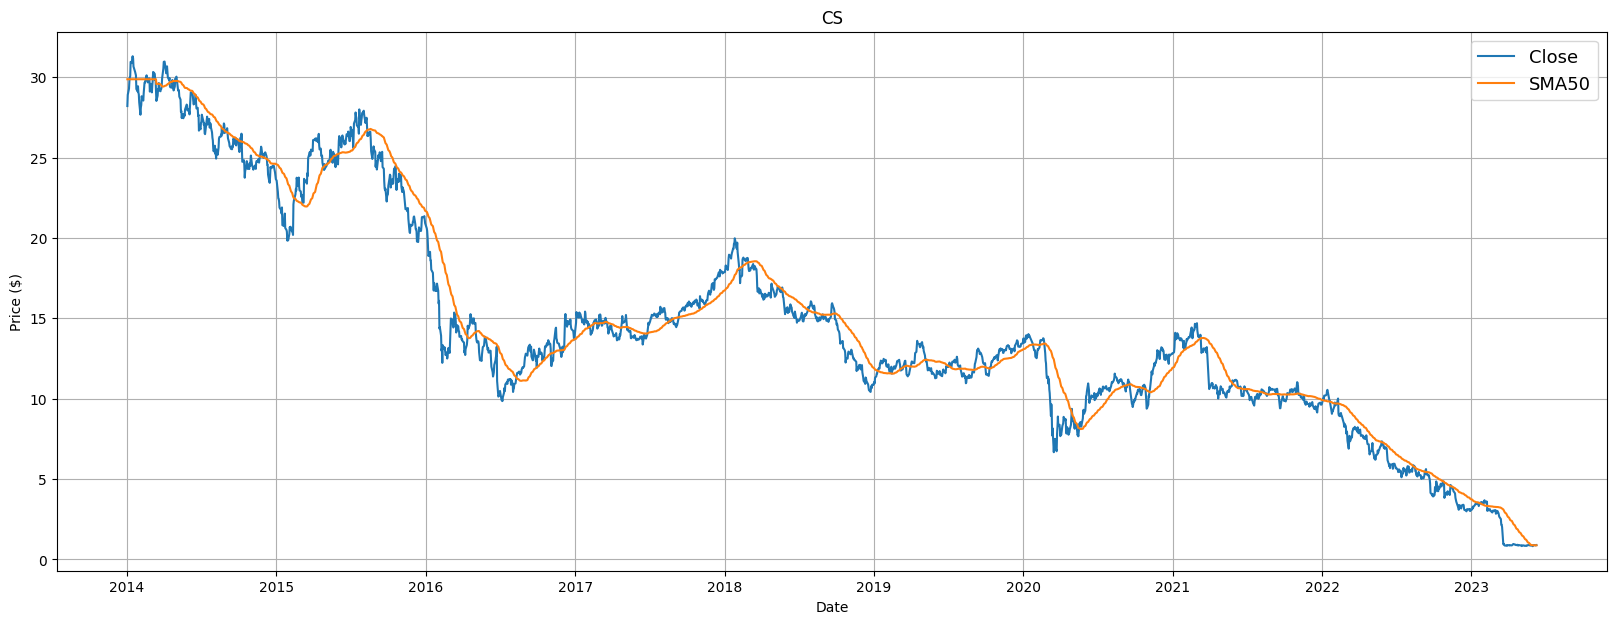

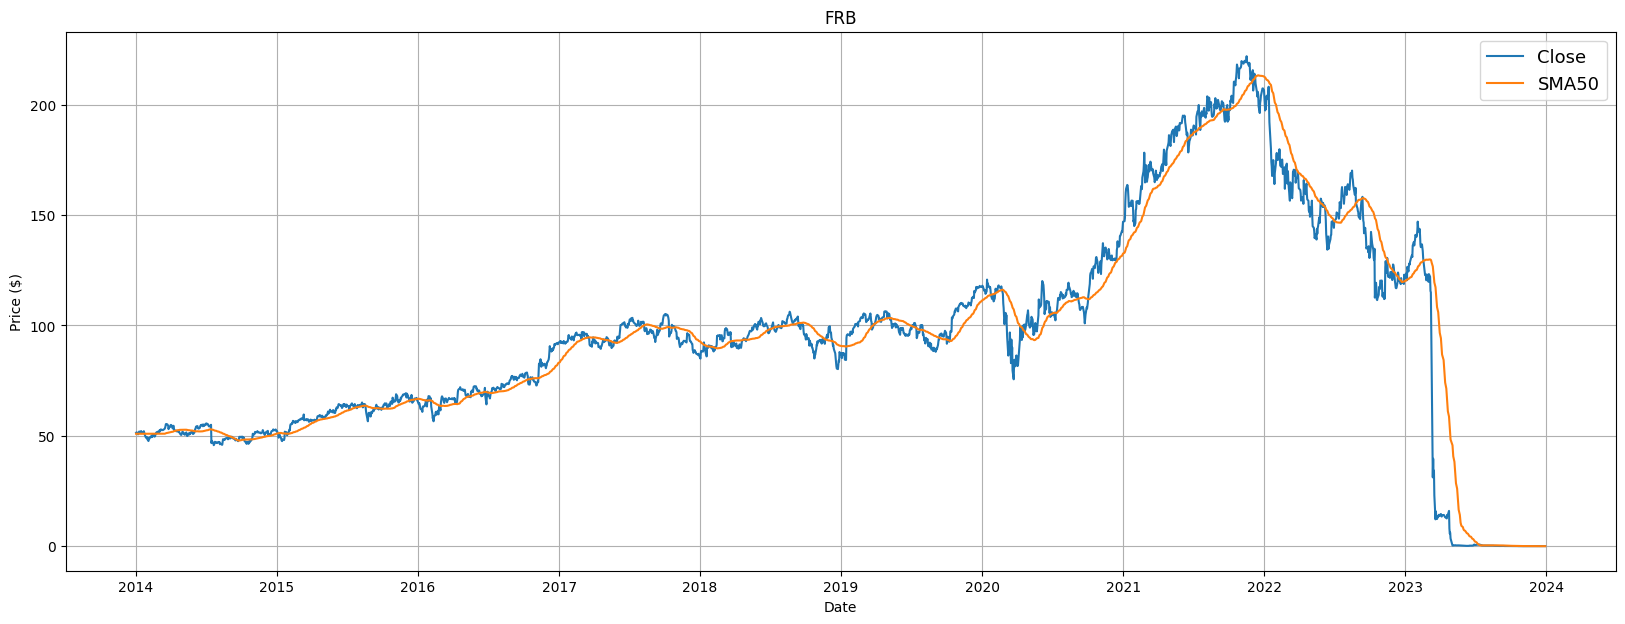

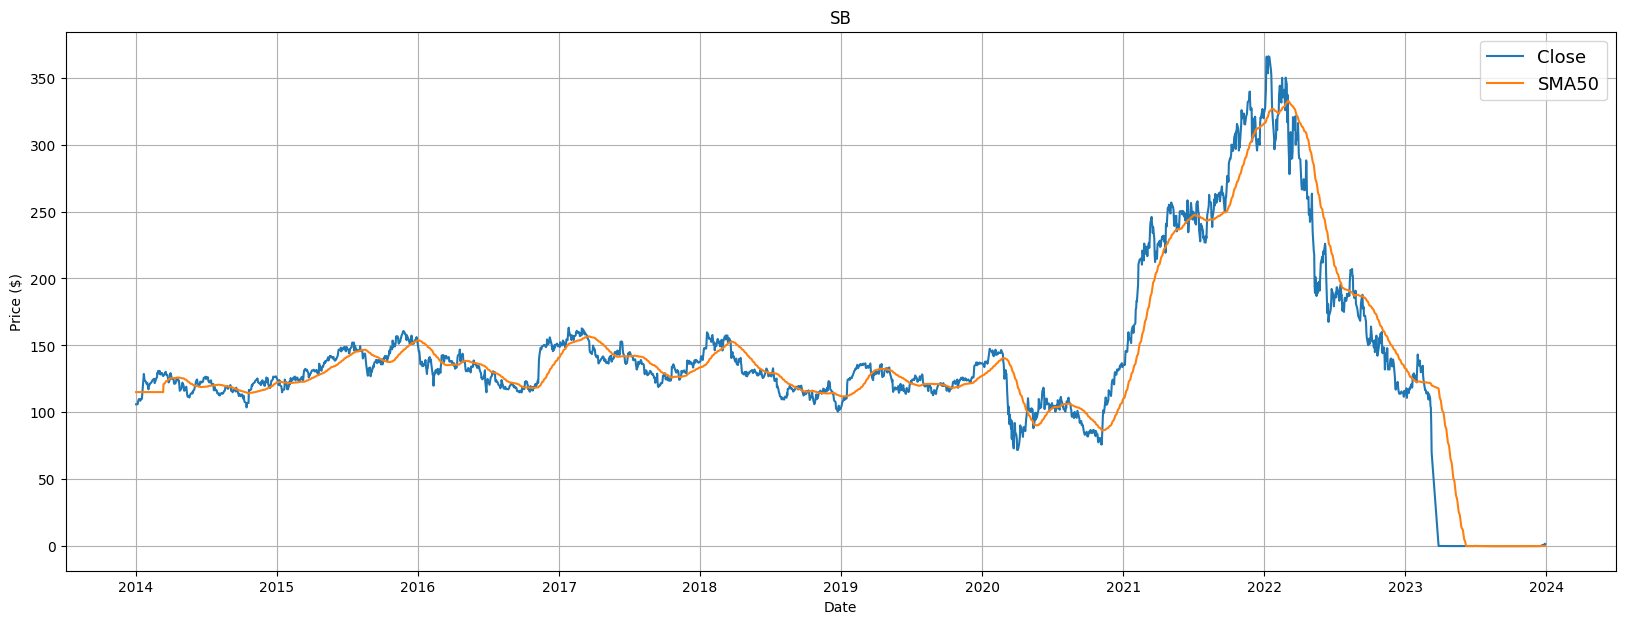

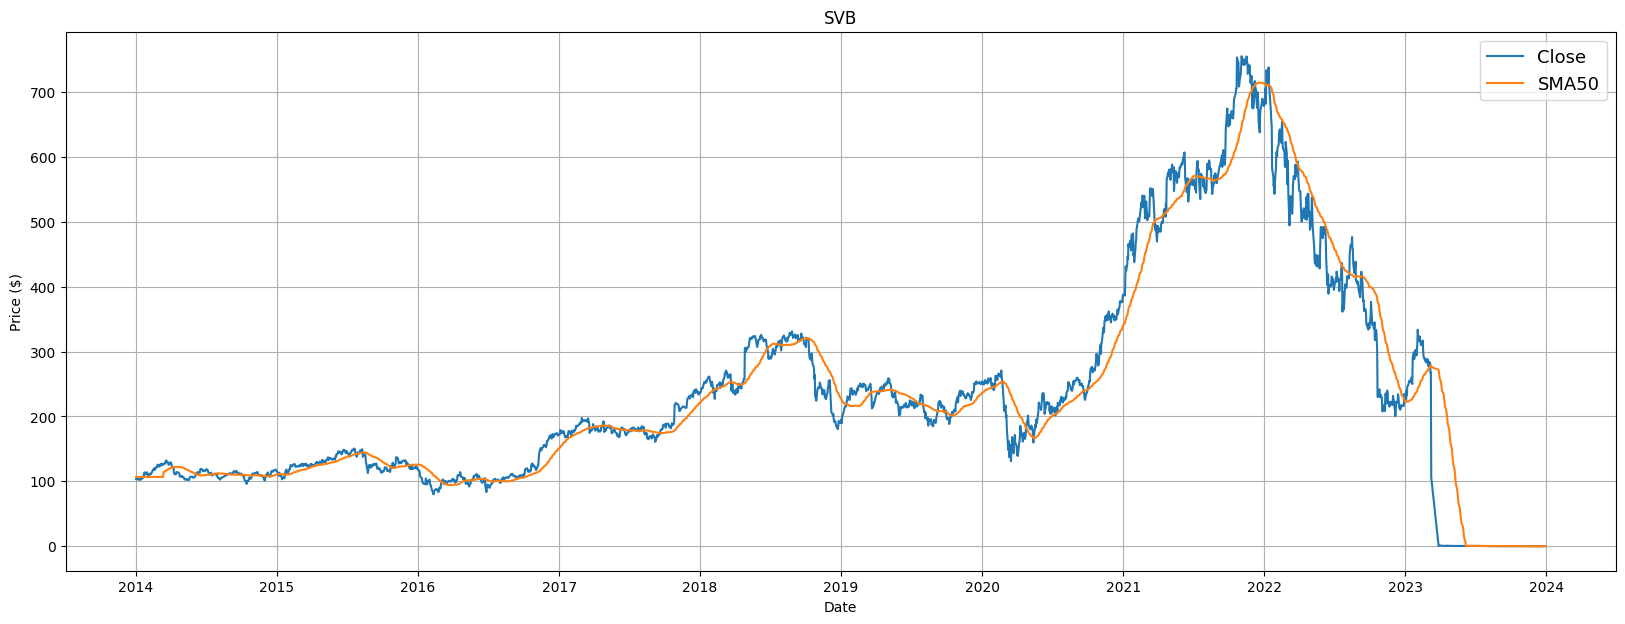

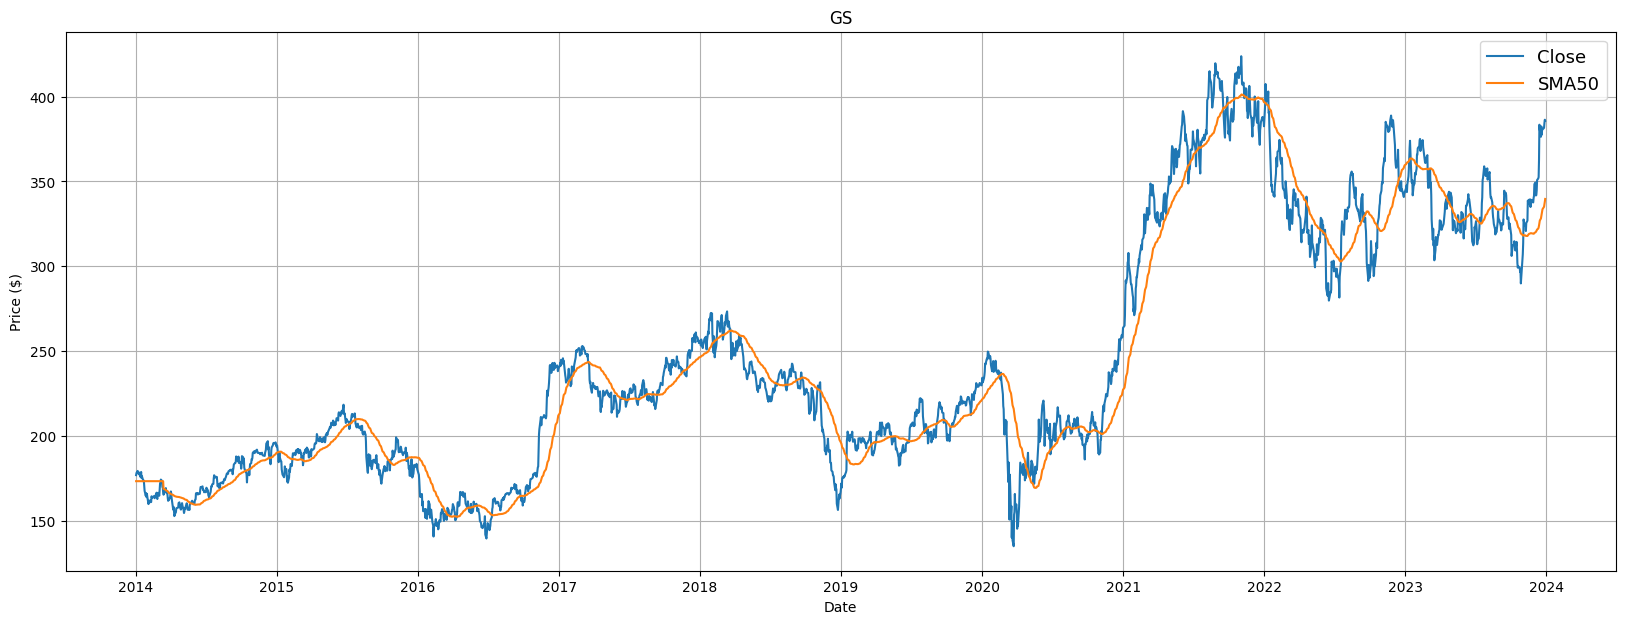

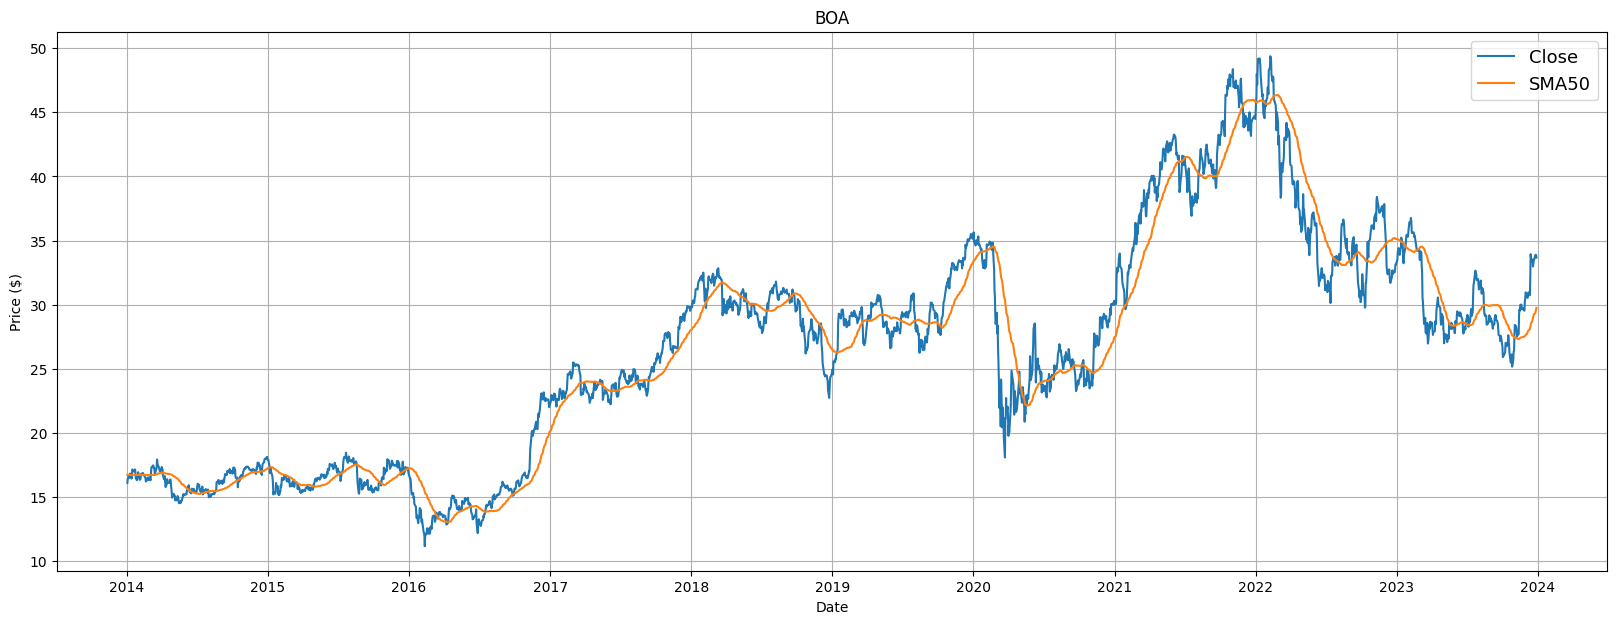

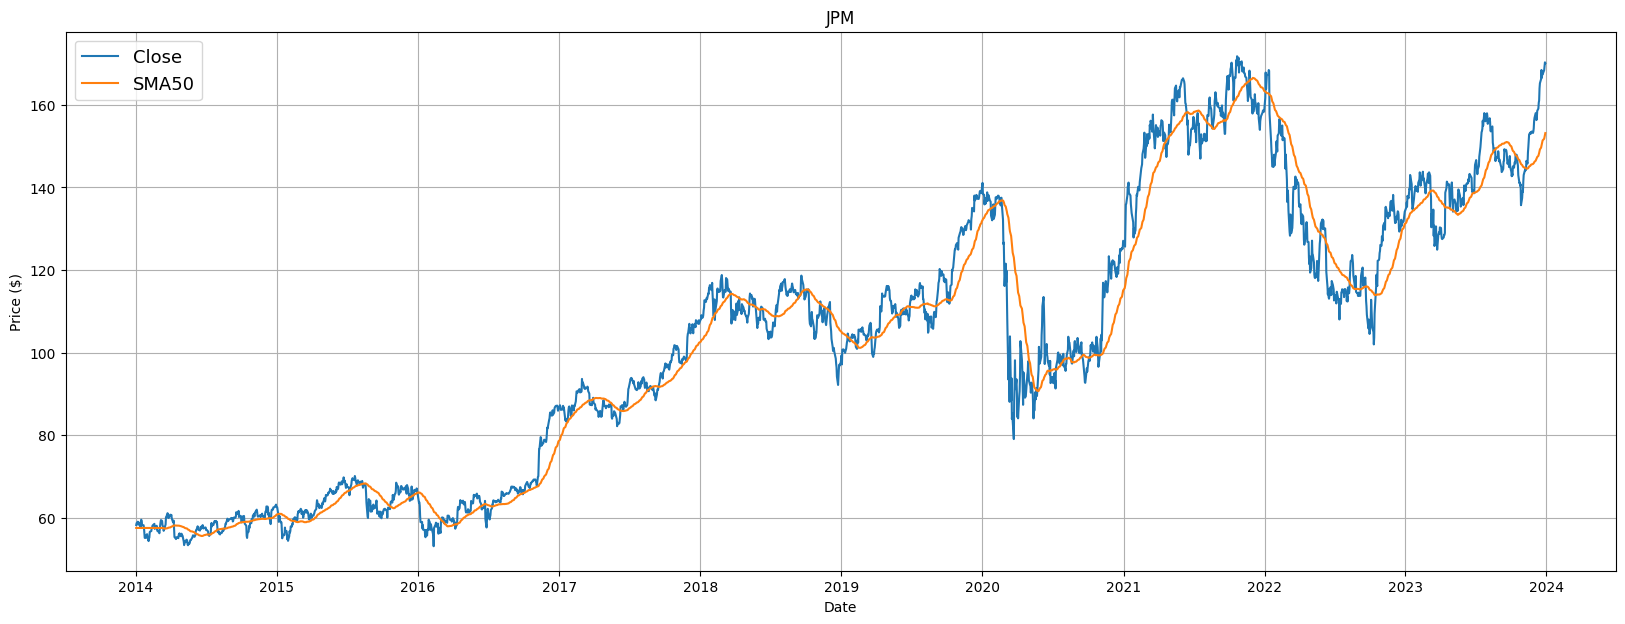

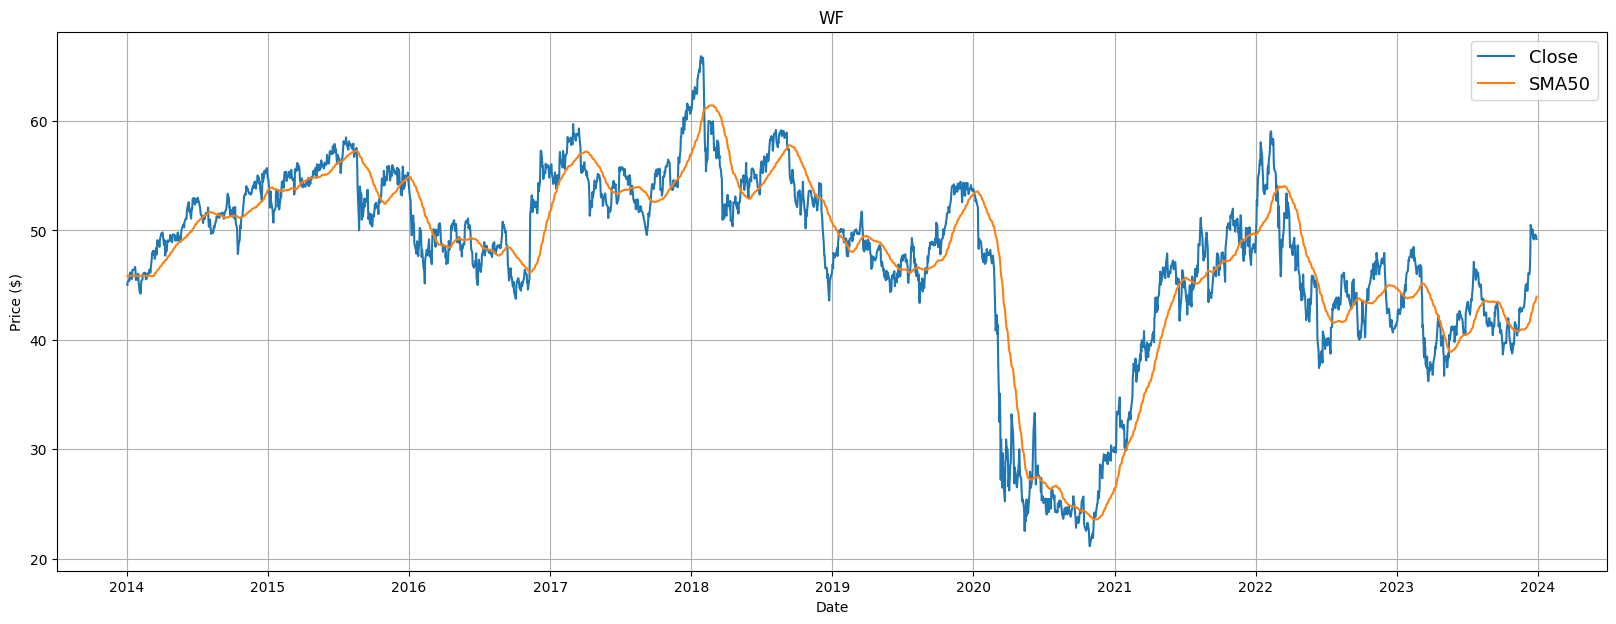

In [4]:
# Plotting close price and SMA50

for bank in banks: #iterate over every crypto
    plt.figure(figsize = (20,7))
    temp = data[data["Tag"] == bank]
    plt.plot(temp.index, temp["Close"], label="Close")
    plt.plot(temp["SMA50"], label="SMA50")
    plt.title(bank)
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend(fontsize=13)
    plt.grid()
    plt.show()

In [5]:
# Daily change in closing price

tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    temp['Close Change'] = temp['Close'].diff()

    temp['Close Change'] = temp['Close Change'].fillna(temp['Close Change'].rolling(5, min_periods=1, center=True).mean())

    tempdf = pd.concat([tempdf, temp])

data = tempdf

In [6]:
# Daily closing price change percent

tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    temp['Close Change %'] = temp['Close'].pct_change() * 100

    temp['Close Change %'] = temp['Close Change %'].fillna(temp['Close Change %'].rolling(5, min_periods=1, center=True).mean())

    tempdf = pd.concat([tempdf, temp])


data = tempdf

In [7]:
# Daily change in volume

tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    temp['Volume Change'] = temp['Volume'].diff()

    temp['Volume Change'] = temp['Volume Change'].fillna(temp['Volume Change'].rolling(5, min_periods=1, center=True).mean())

    tempdf = pd.concat([tempdf, temp])

data = tempdf

In [8]:
# Daily volume change percent

tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    temp['Volume Change %'] = temp['Volume'].pct_change() * 100

    temp['Volume Change %'] = temp['Volume Change %'].fillna(temp['Volume Change %'].rolling(5, min_periods=1, center=True).mean())

    tempdf = pd.concat([tempdf, temp])

data = tempdf

In [9]:
# price relative to simple moving average

tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    temp['Close/SMA'] = temp['Close'] / temp['SMA50']

    tempdf = pd.concat([tempdf, temp])

data = tempdf

In [10]:
# Amihud illiquidity ratio

tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    temp["Daily Dollar Volume"] = temp["Close"] * temp["Volume"]

    temp["Amihud"] = (abs(temp["Close Change"]) / temp["Daily Dollar Volume"]) * 1000000

    tempdf = pd.concat([tempdf, temp])

data = tempdf

Import snp data, which will be used in the default definition

In [11]:
#snp data

snp = pd.read_csv(r"Datasets/S&P 500 Historical Data.csv")
snp['Date'] = pd.to_datetime(snp['Date'], format="%d/%m/%y")
snp.set_index('Date', inplace=True)
snp.sort_index(inplace=True)

### Defining default

Default = \
\
1 \
if decrease in closing price from time t-1 to time t >= 30%, OR the decrease in closing price from time t-1100 to t >= 30% \
\
0 \
otherwise

In [12]:
def defDefault(df):
    look_back_period = 1100 # no. of days

    change_threshold = -30

    condition = (df['Close'].pct_change() * 100 < change_threshold) | (df['Close'].pct_change(look_back_period) * 100 < change_threshold)
    
    df["Default"] = condition.astype(int)

Adding default indicator to our dataset and the S&P dataset

In [13]:
# snp default
defDefault(snp)

In [14]:
# banks default
tempdf = pd.DataFrame()

for bank in banks:
    temp = data[data["Tag"] == bank]

    defDefault(temp)

    for i in temp.index:
        if i in snp.index:
            if temp["Default"][i] == 1 and snp["Default"][i] == 0:
                temp["Default"][i] = 1
            else:
                temp["Default"][i] = 0

    tempdf = pd.concat([tempdf, temp])

data = tempdf

### Defining target variable

Will_fail = \
1; if there exists a default in the next 90 days time window \
0; otherwise

In [15]:
window = 90 # days

data['Will_default'] = 0

tempdf = pd.DataFrame()

# Iterate through each bank and calculate the target variable
for bank in banks:

    temp = data[data['Tag'] == bank]

    # for all defaults
    for i in range(len(temp)):        
        # Check if there is any default in the next 90 days
        if temp['Default'].iloc[i + 1: min(i + 1 + window, len(temp) + 1)].sum() > 0:
            temp["Will_default"].iloc[i] = 1

    # for first default
    # defaulting = False
    # for i in range(len(temp)):        
    #     # Check if there is any default in the next 90 days
    #     if temp['Default'].iloc[i + 1: min(i + 1 + window, len(temp) + 1)].sum() > 0:
    #         if not defaulting:
    #             temp["Will_default"].iloc[i] = 1
    #             defaulting = True
    #     else:
    #         defaulting = False
            
    tempdf = pd.concat([tempdf, temp])

data = tempdf

Plotting the defaults and the target variable of the prediciton of default

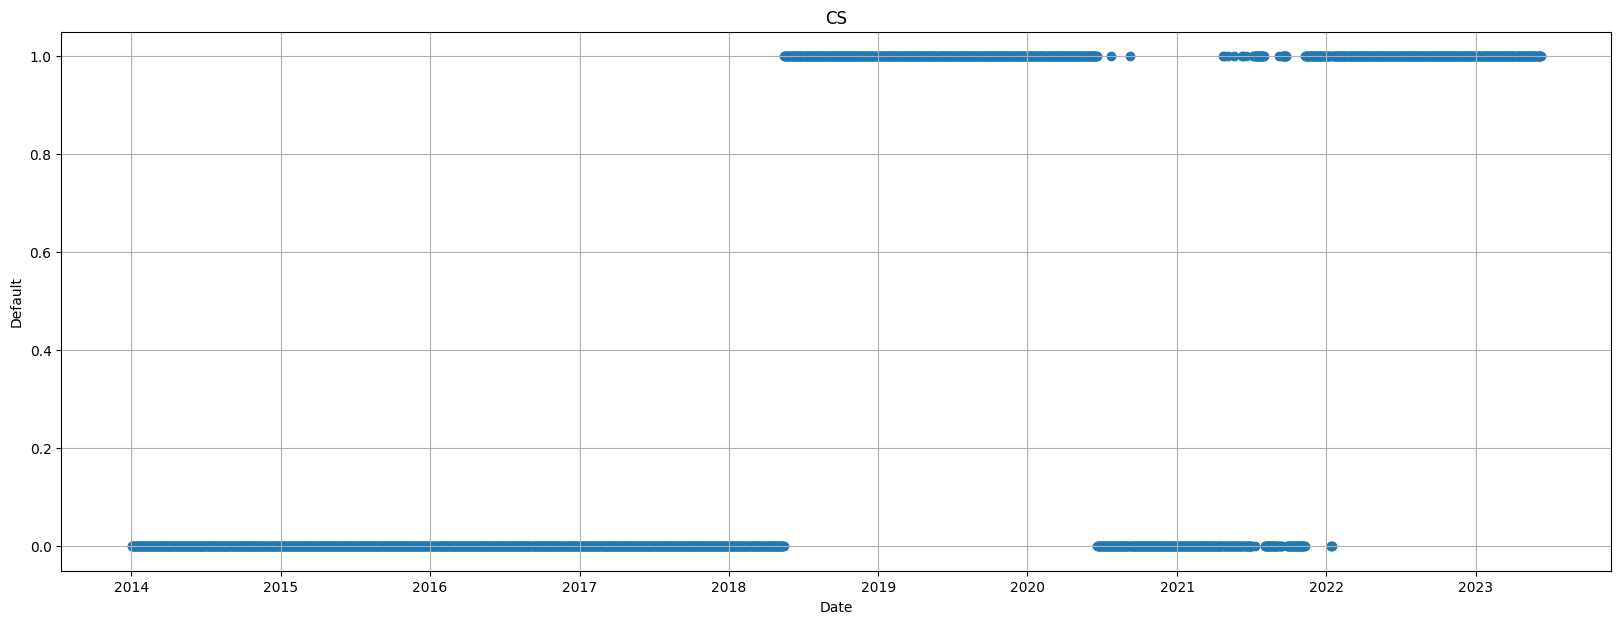

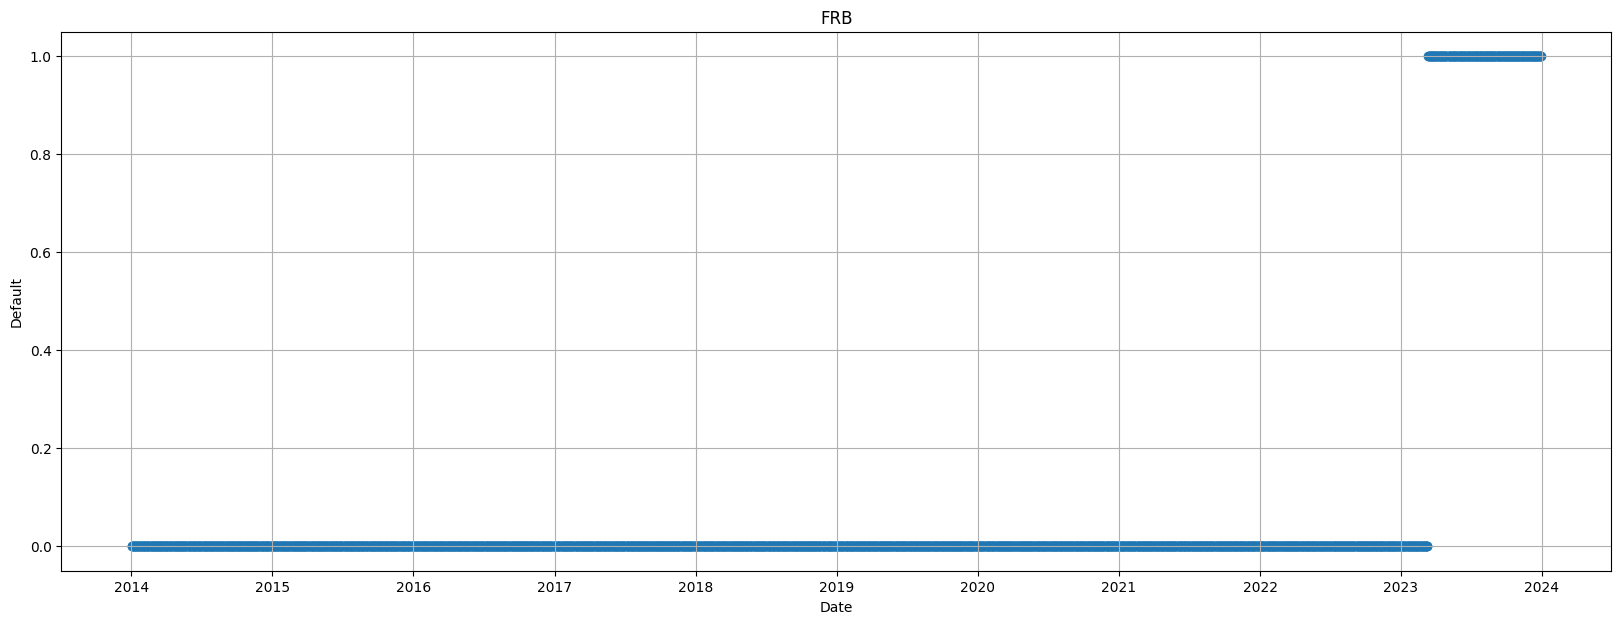

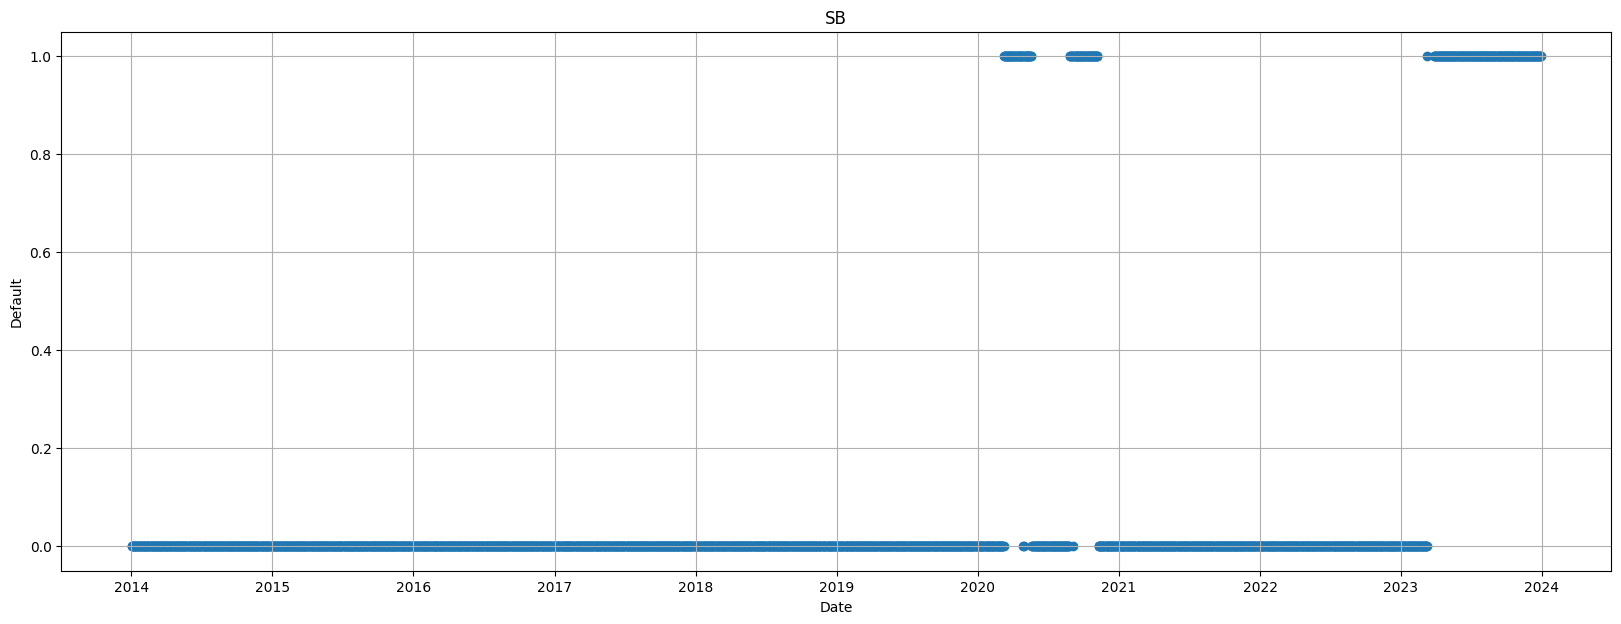

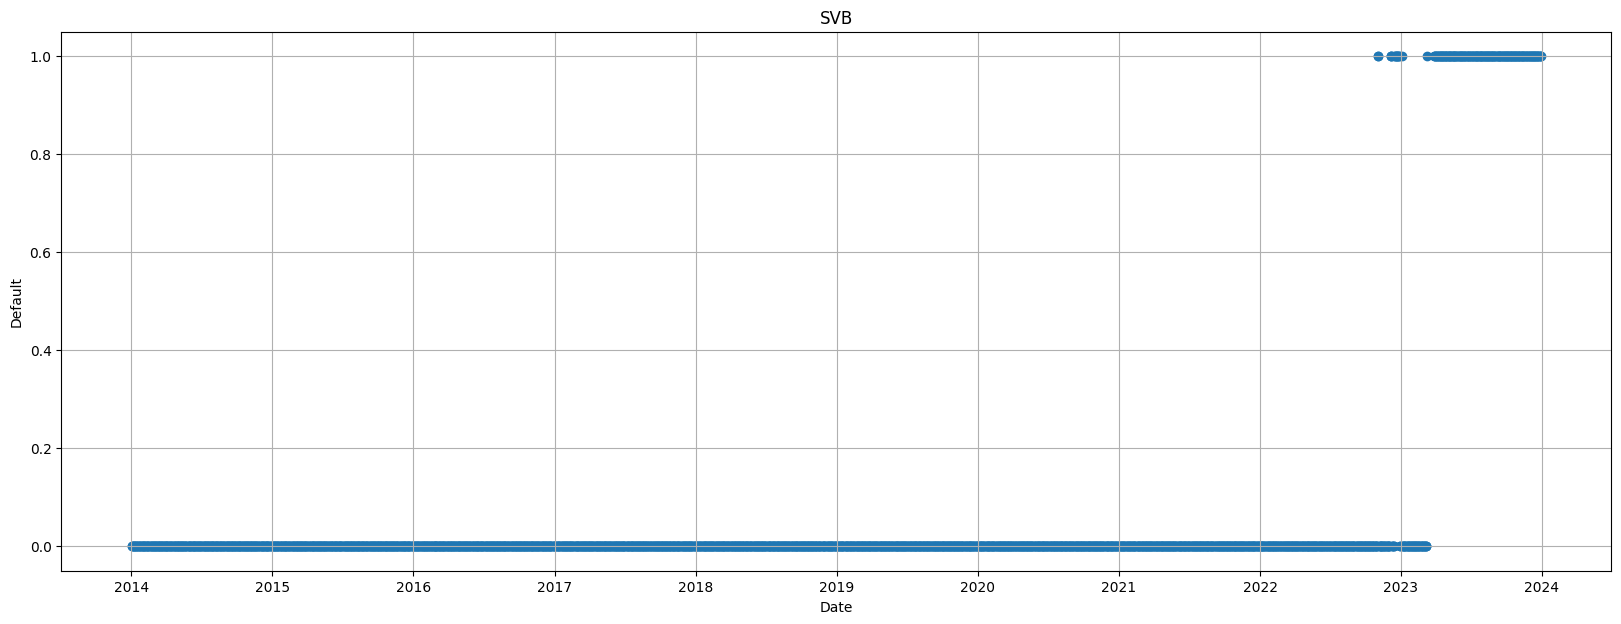

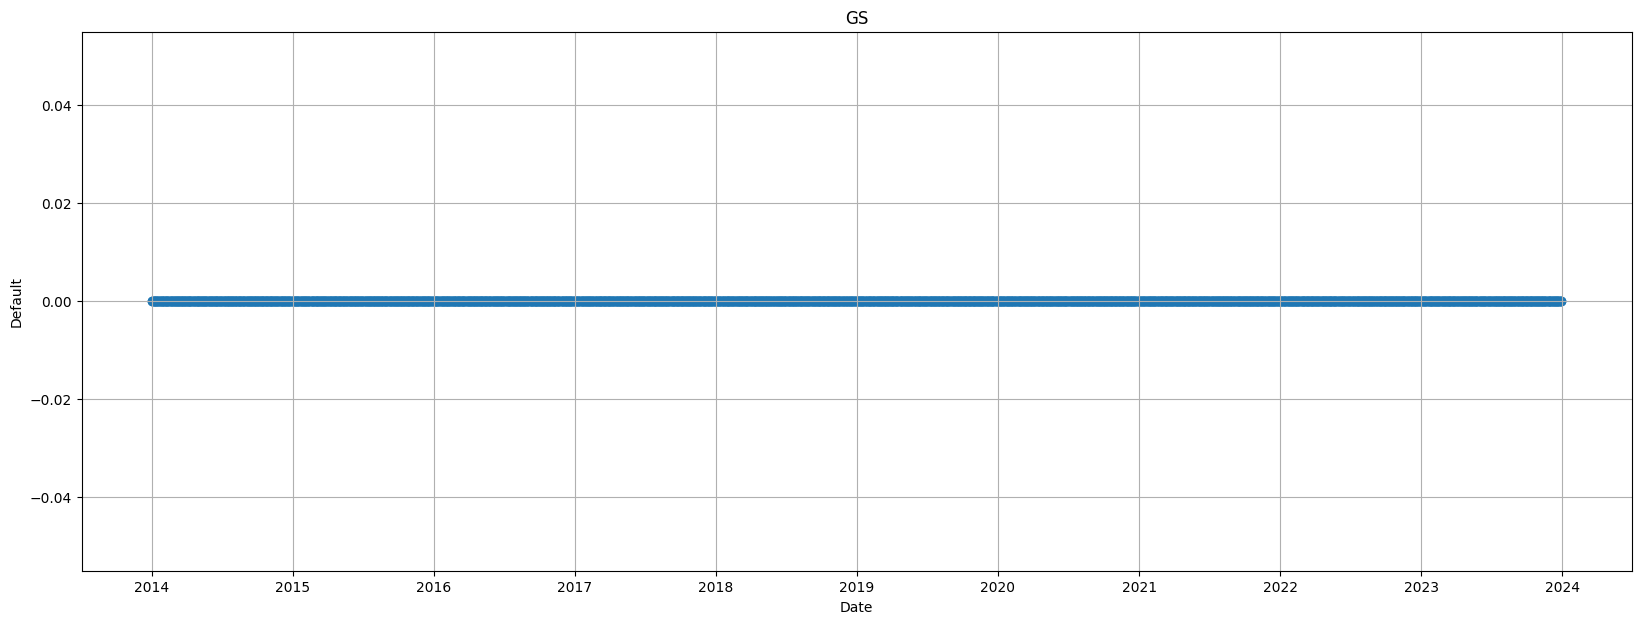

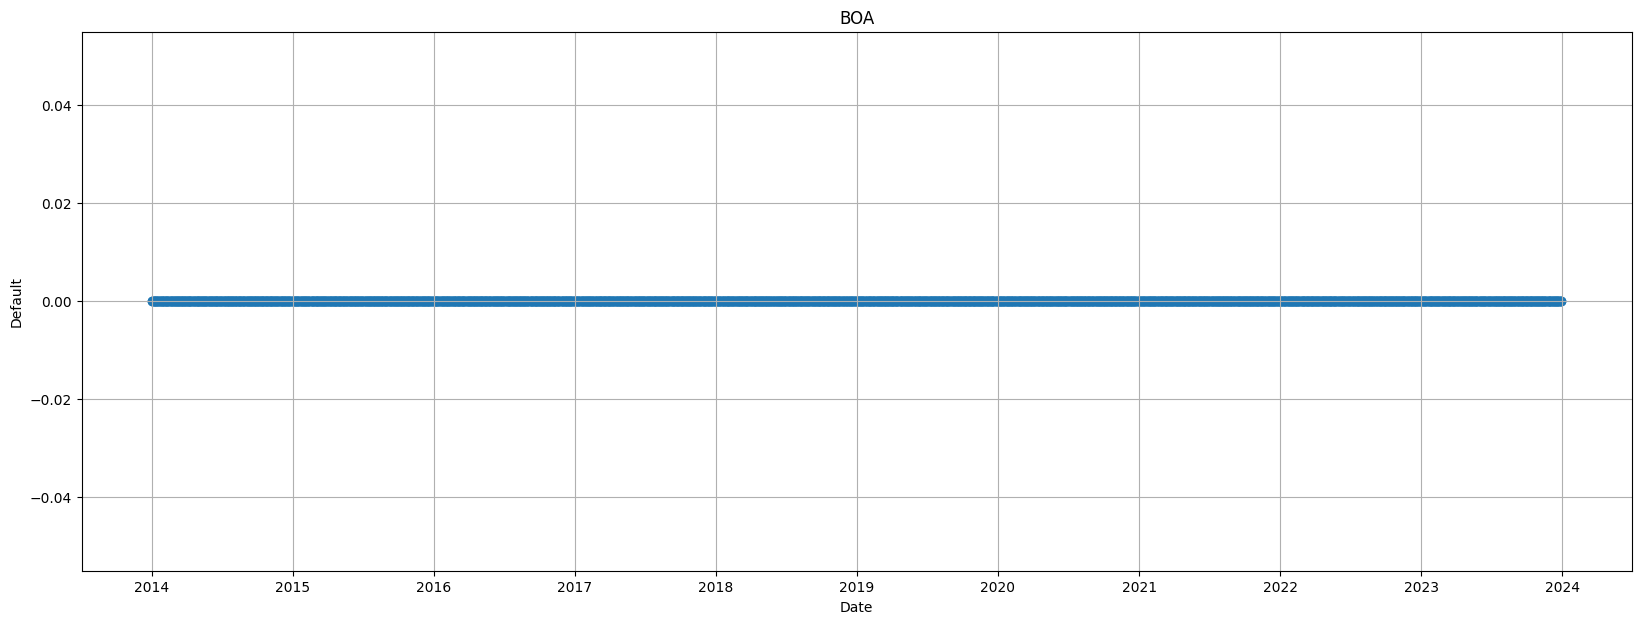

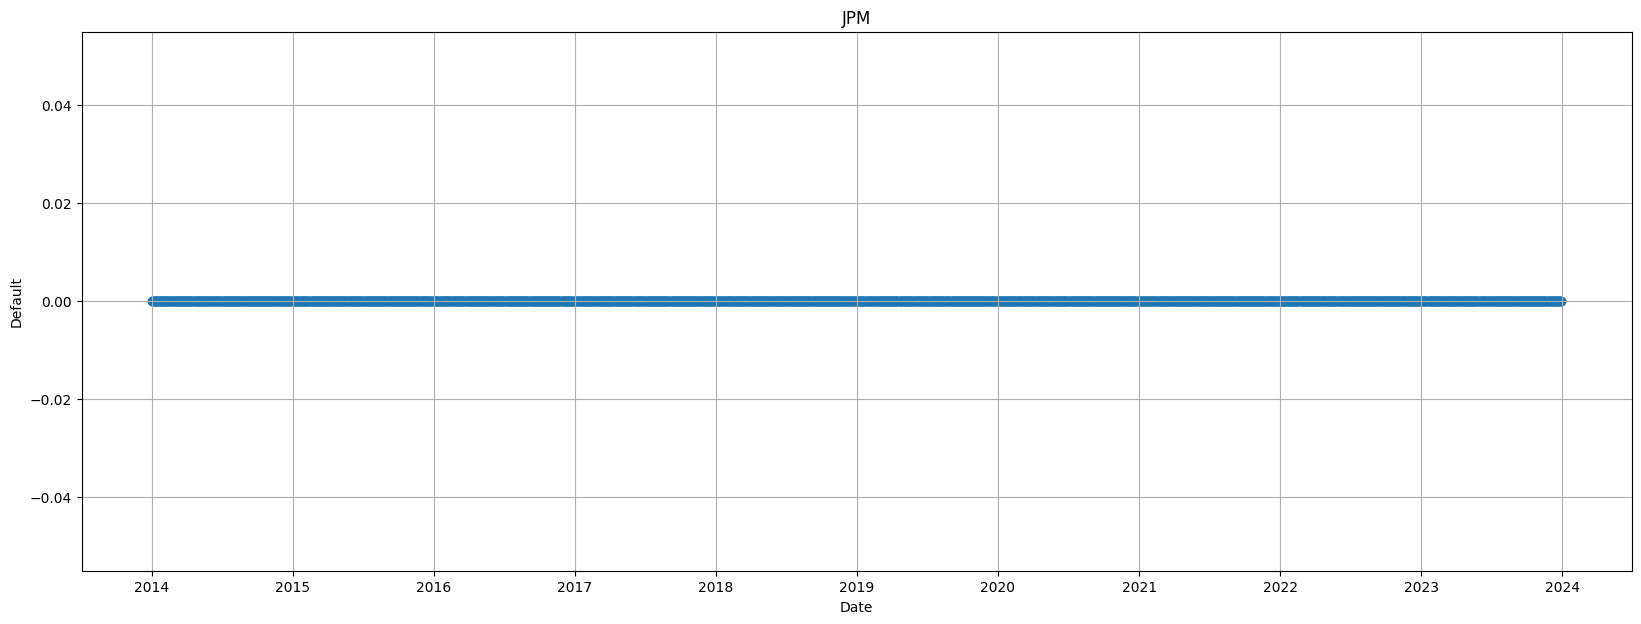

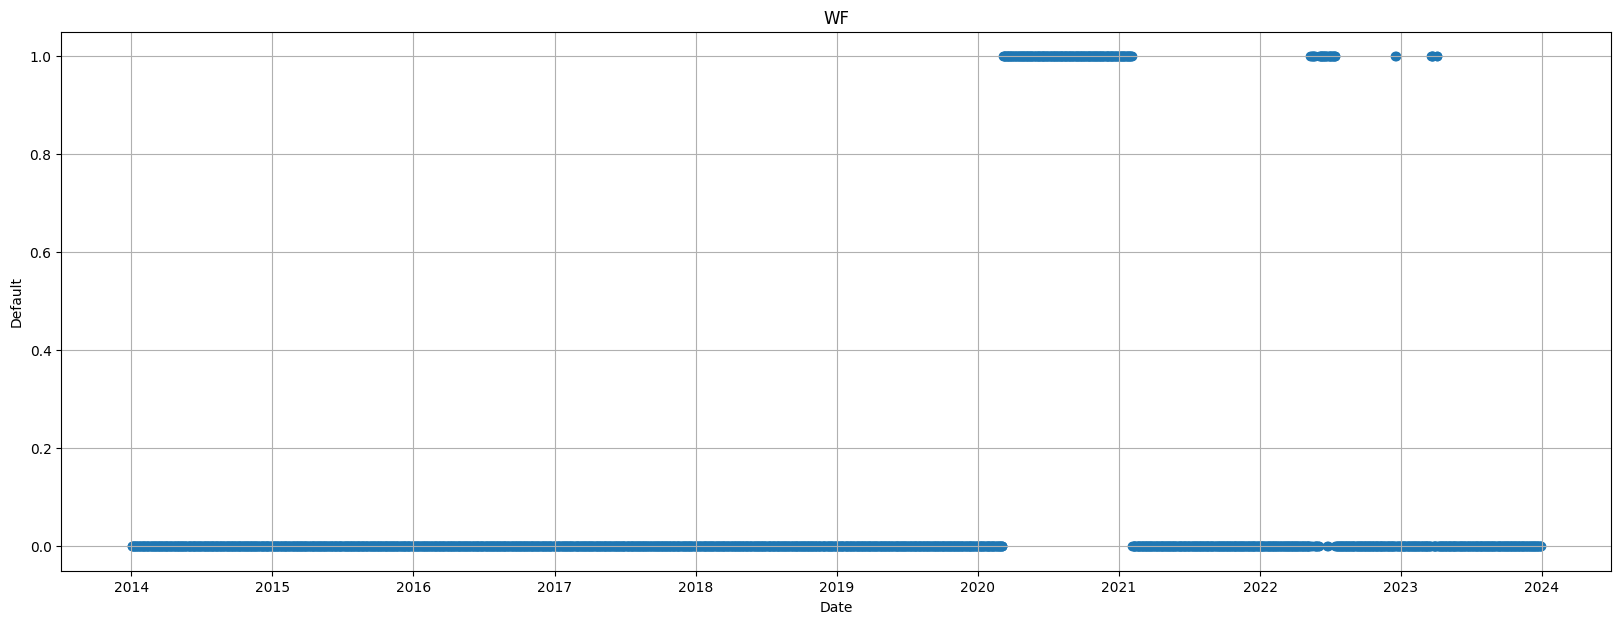

In [16]:
for bank in banks: #iterate over every bank
    plt.figure(figsize = (20,7))
    temp = data[data["Tag"] == bank]
    plt.scatter(temp.index, temp["Default"])
    plt.title(bank)
    plt.xlabel("Date")
    plt.ylabel("Default")
    plt.grid()
    plt.show()

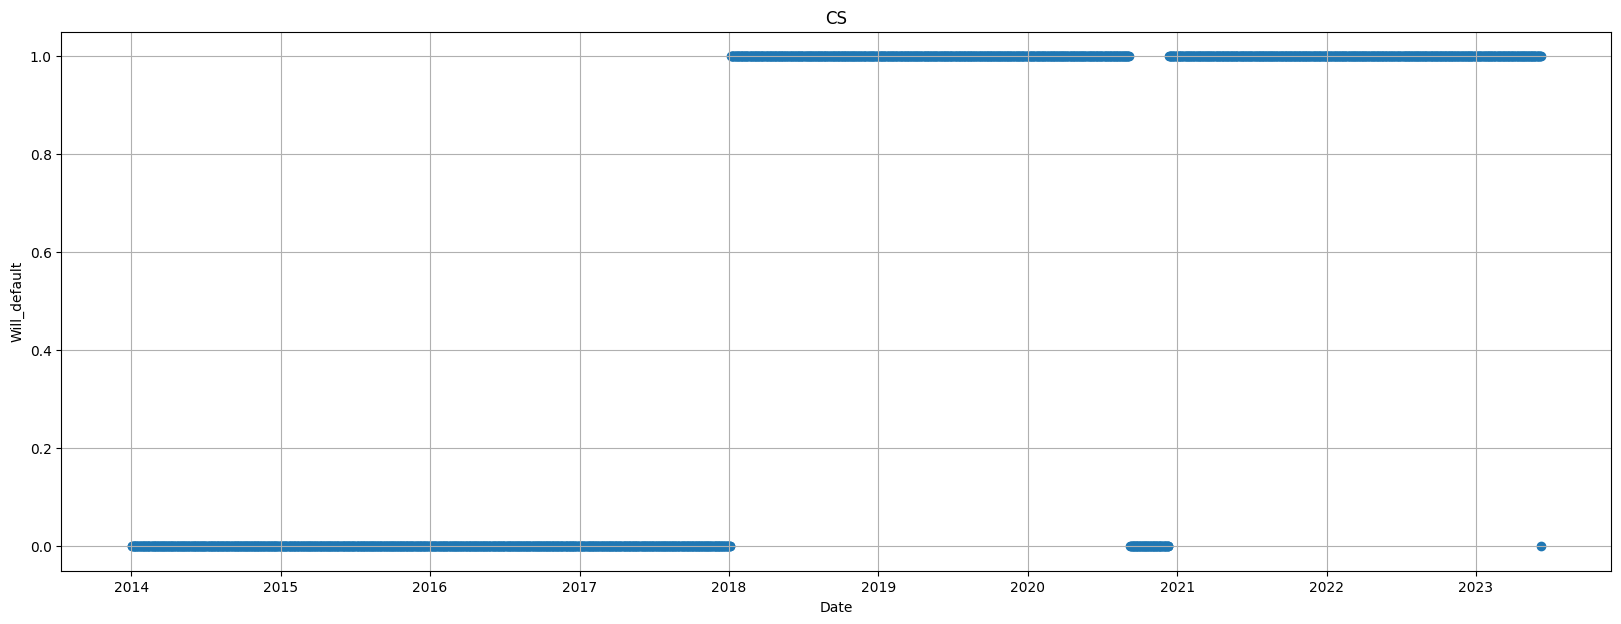

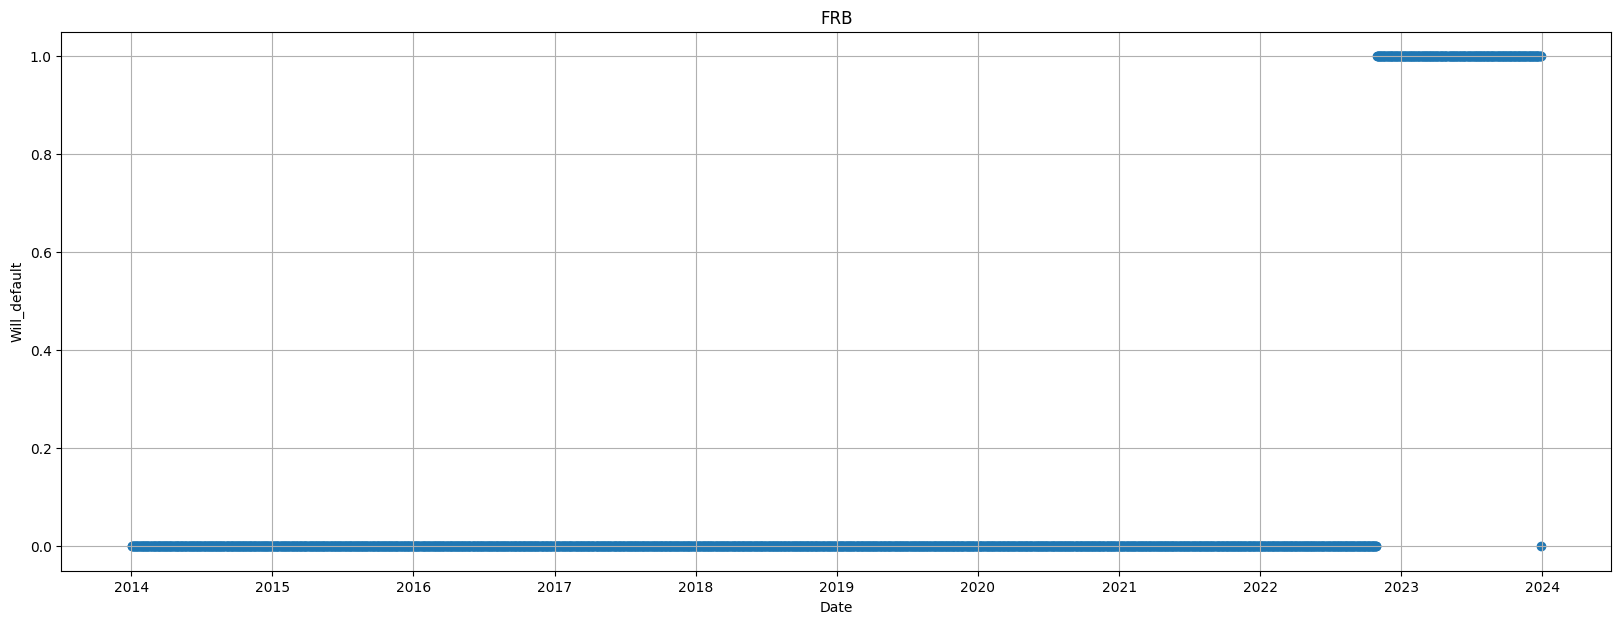

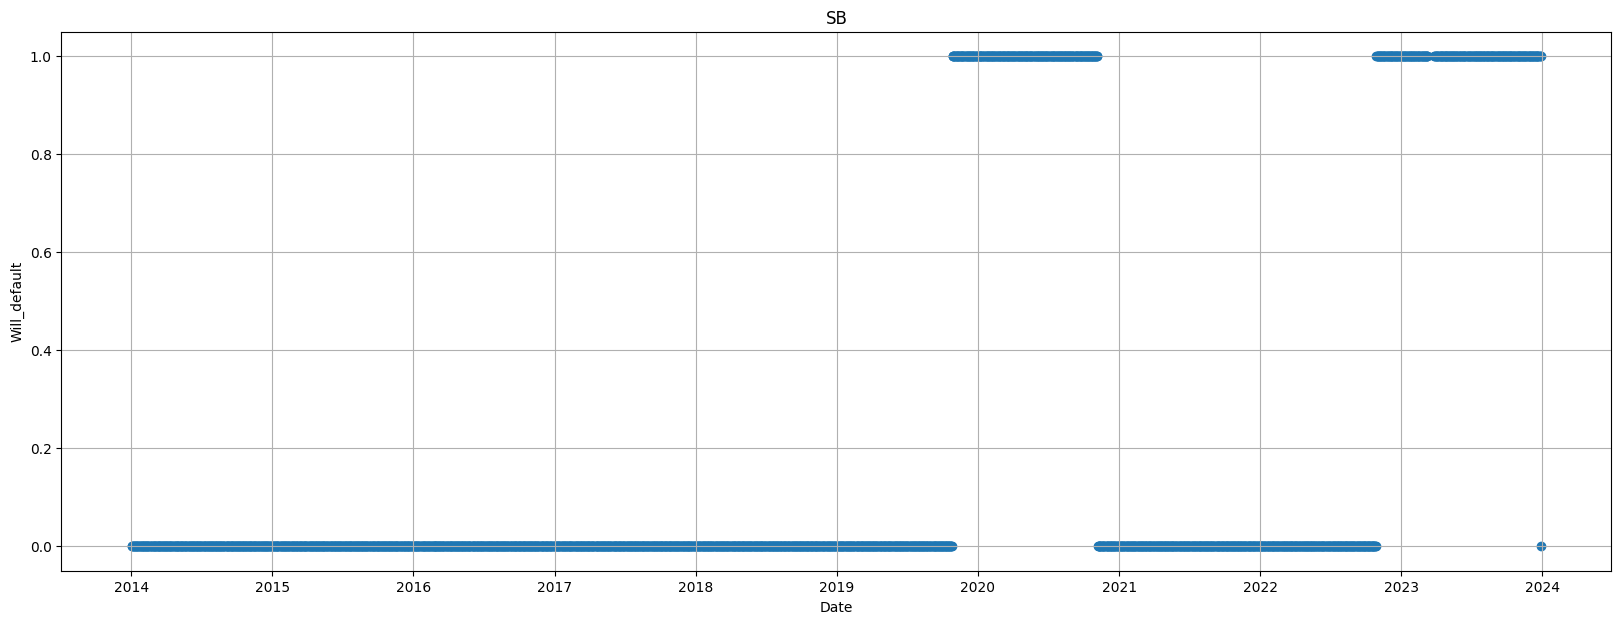

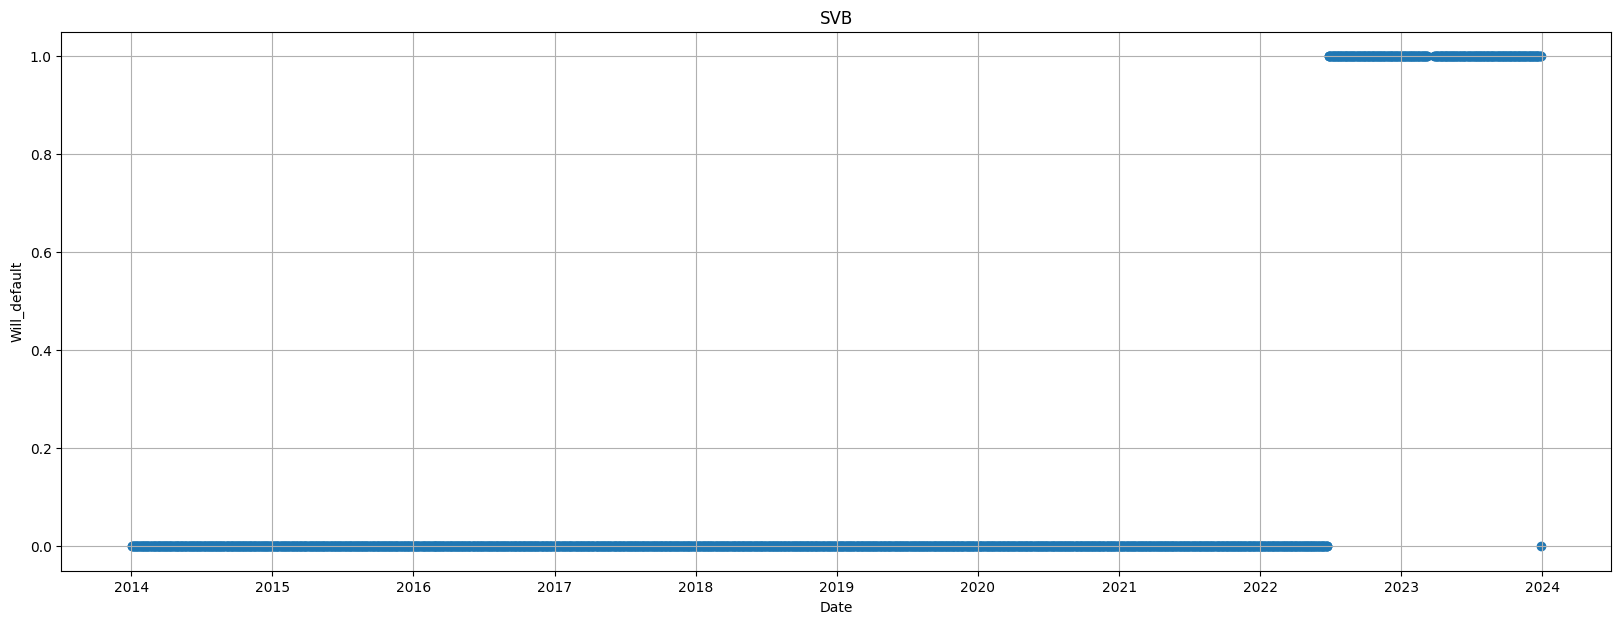

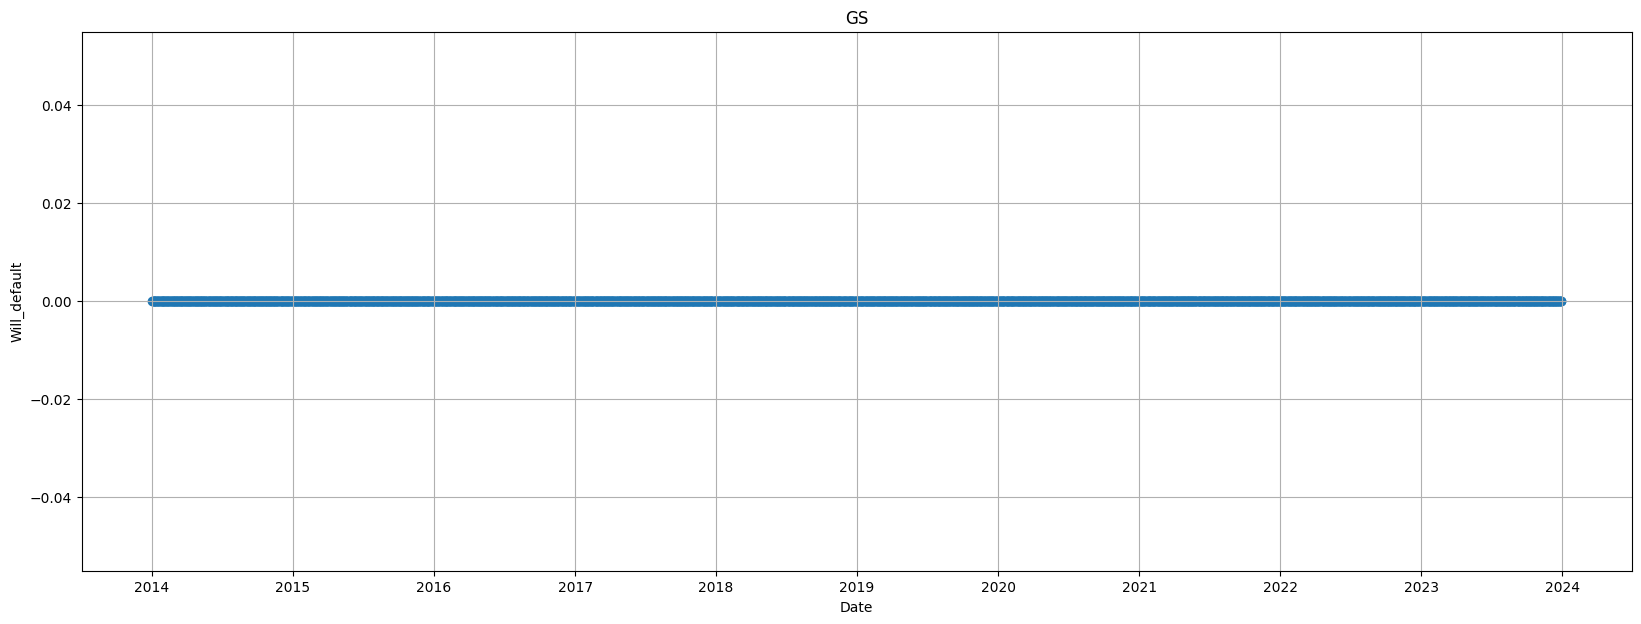

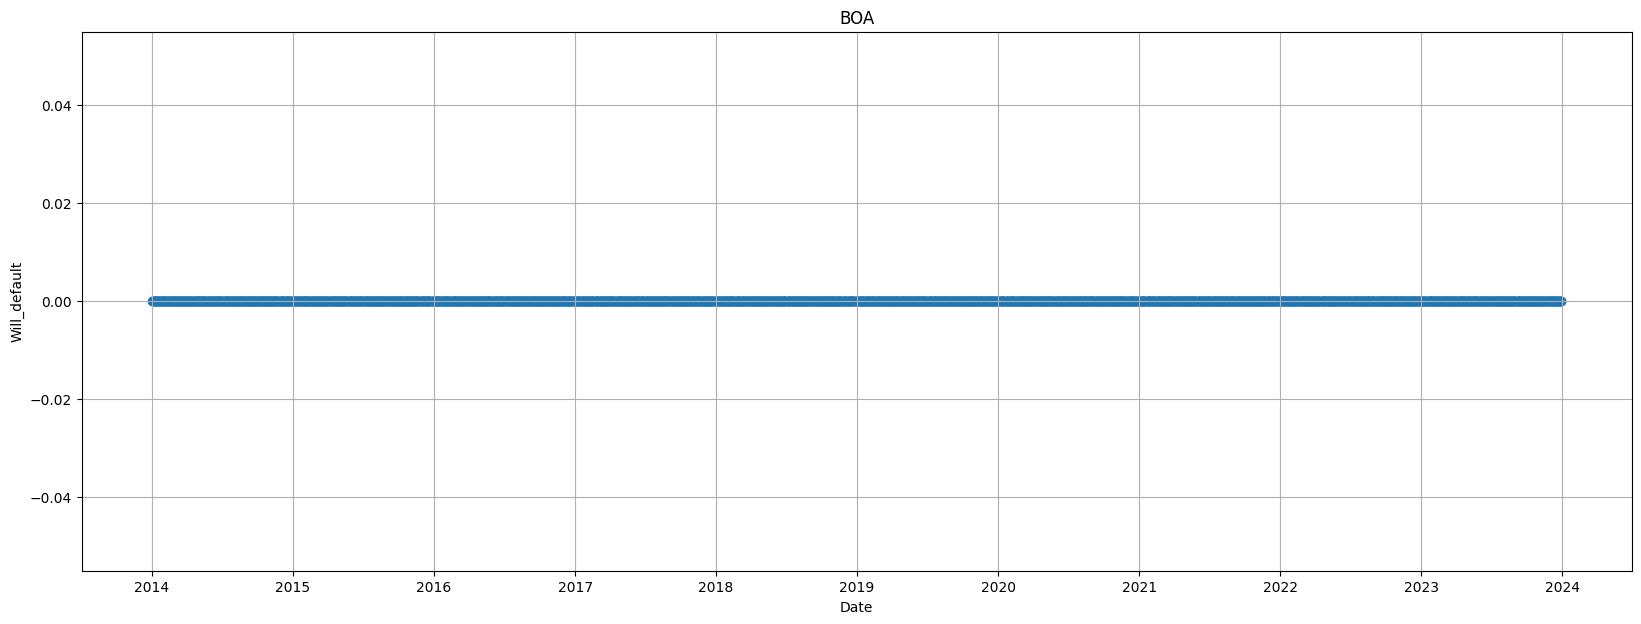

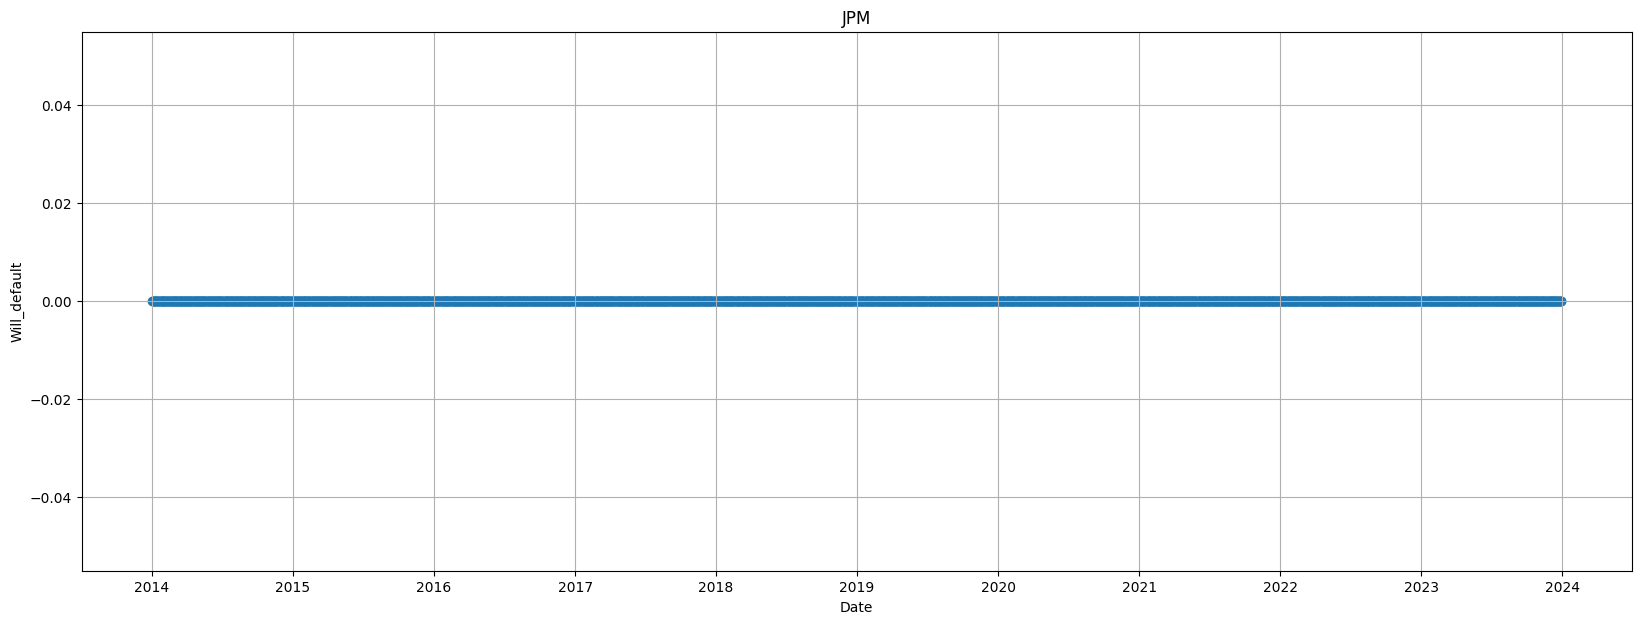

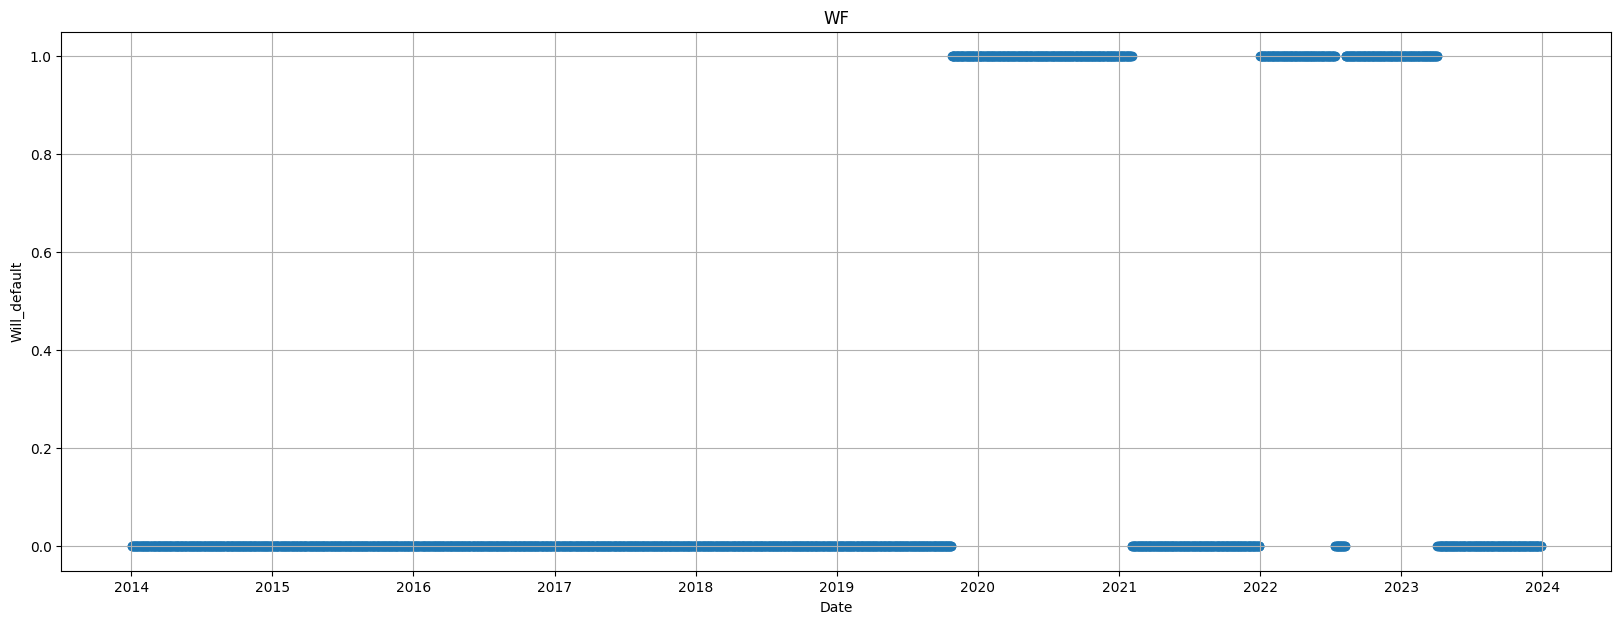

In [17]:
for bank in banks: #iterate over every bank
    plt.figure(figsize = (20,7))
    temp = data[data["Tag"] == bank]
    plt.scatter(temp.index, temp["Will_default"])
    plt.title(bank)
    plt.xlabel("Date")
    plt.ylabel("Will_default")
    plt.grid()
    plt.show()

### Modelling

We plan to use a Random Forest Classifier Model for default prediction

In [18]:
# import the required libraries

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [19]:
features = ['Close', 'Open', 'High', 'Low', 'Volume', 'SMA50', 'Close Change', 'Close Change %','Volume Change', 'Volume Change %', 'Close/SMA', 'Amihud']
target = 'Will_default'

X = data[features]
y = data[target]

# Handle missing values and infinities
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(method='ffill', inplace=True)
X.fillna(method='bfill', inplace=True)
X.fillna(X.median(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Initialize the Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test) # predicted defaults
y_prob = model.predict_proba(X_test)[:, 1] # predicted probabilities of the positive defaults

In [21]:
# Evaluate the model

# accuracy: Provides the overall correctness of the model's predictions.
accuracy = accuracy_score(y_test, y_pred)

# precison: How many of the predicted defaults were actual defaults
precision = precision_score(y_test, y_pred)

# recall: How many actual defaults were correctly identified
recall = recall_score(y_test, y_pred)

# f1: Balances precision and recall - harmonic mean of precision and recall
f1 = f1_score(y_test, y_pred)

# roc_auc_score (Receiver Operating Characteristic - Area Under the Curve score): Compares the predicted probabilities (y_prob) 
# against the true labels (y_test) and calculates the AUC (discrimination ability of the model) --> 1 = perfect model
roc_auc = roc_auc_score(y_test, y_prob)

print("Random Forest Model Accuracy:", accuracy)
print("Random Forest Model Precision:", precision)
print("Random Forest Model Recall:", recall)
print("Random Forest Model F1 Score:", f1)
print("Random Forest Model ROC-AUC:", roc_auc)

Random Forest Model Accuracy: 0.9609316303531179
Random Forest Model Precision: 0.9222423146473779
Random Forest Model Recall: 0.8186195826645265
Random Forest Model F1 Score: 0.8673469387755102
Random Forest Model ROC-AUC: 0.9878883644278903


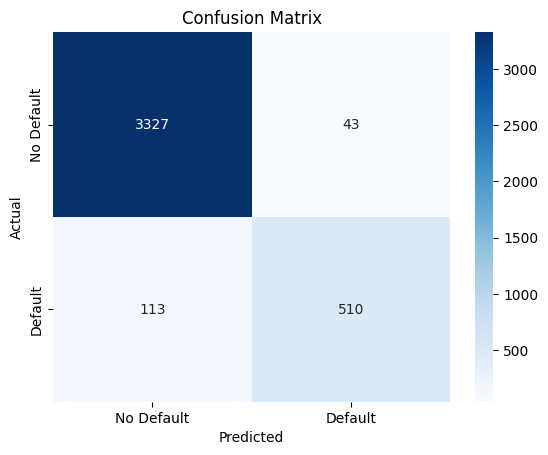

In [22]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter Tuning

In [23]:
param_dist = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [10, 20, 30]}


model = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(model, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_model = rand_search.best_estimator_

# Generate predictions with the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

In [24]:
# Evaluate the best model

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Random Forest Model Accuracy:", accuracy)
print("Random Forest Model Precision:", precision)
print("Random Forest Model Recall:", recall)
print("Random Forest Model F1 Score:", f1)
print("Random Forest Model ROC-AUC:", roc_auc)

Random Forest Model Accuracy: 0.9599298772852491
Random Forest Model Precision: 0.9247706422018349
Random Forest Model Recall: 0.8089887640449438
Random Forest Model F1 Score: 0.863013698630137
Random Forest Model ROC-AUC: 0.9878521655052845


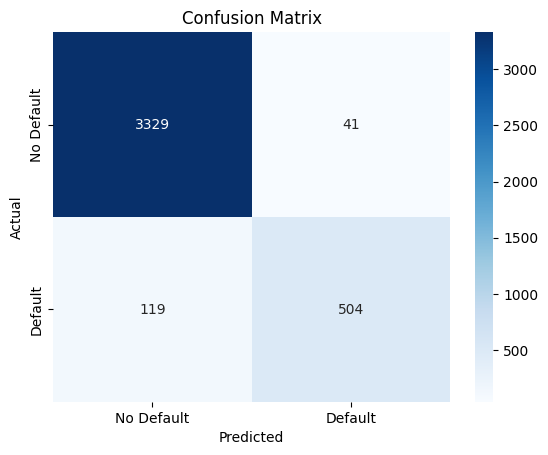

In [25]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We see that the best model we get is of roughly 96% accuracy with 504 accurate default predictions.